## Machine Learning Project

## Rental Analysis of Banglore City Using Various Parameters.

### Scenario1:--

consider you are moving to bangalore for job settlement and this is the first time you are visiting Bangalore.you might not be aware of bangalore and didn't have any connections there so it will be very difficult for you to settle there. So to tackle this problem we shall use Machine Learning Algorithms alongside with Foursquare API to get the details of various appartments in bangalore along with their precise Latitudes and Longitudes(available Below). 
Now for choosing for a best appartment you need to consider the following facts:
1. Are there any Restaurants Available nearby to Appartment?.
2. are there any cafe's nearby?
3. What are the parameters affecting price hikes?
4. Are they "ready to move"?, If not when can i move to those Apprtments?
5. what is the square feet of the appartment?
6. in what distance can i find a badminton court from my appartment?

## Scenario2:-

Consider you are willing to establish a new restaurant business in bangalore city and looking for very minimum competition to tackle the problem we shall use Machine Learning to get you the best suitable areas to establish your restaurant based on other filters like:
1. is it Ready to move?
2. How many rooms are available?
3. Square feet of the area
4. is it near to any badminton court?

## Let's Begin Analysis

In [167]:
# Importing Required Libraries

In [1]:
import os # Operating System
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes
import folium #import folium # map rendering library

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
# Reading The DataSet
df_bglr=pd.read_csv("Bengaluru_House_Data.csv")
df_bglr.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Adding Latitude and logitude columns for our later use
df_bglr["latitude"]=np.NaN
df_bglr["longitude"]=np.NaN
for i in range(0,13320):
    df_bglr["latitude"]="a"
    df_bglr["longitude"]="a"
df_bglr_tail_300=df_bglr.tail(300).copy()


In [5]:
#Taking last 300 rows
df_bglr_tail_300=pd.read_csv("df_bglr_tail_300.csv")
df_bglr_tail_300.drop(["Unnamed: 0"],axis=1,inplace=True)
df_bglr_tail_300

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,latitude,longitude
0,Plot Area,Ready To Move,5th Phase JP Nagar,4 Bedroom,NaN,2400,4.0,1.0,228.00,12.5805368,77.3330675
1,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1195,2.0,2.0,59.00,12.9363389,77.6014985
2,Super built-up Area,Ready To Move,Bannerghatta Road,2 BHK,DSnjh S,1022,2.0,1.0,35.00,12.976959149999999,77.5123160731423
3,Plot Area,Ready To Move,Hegde Nagar,6 Bedroom,NaN,760,6.0,0.0,98.00,12.96577205,77.70809738675413
4,Super built-up Area,Ready To Move,Dodda Nekkundi,2 BHK,Niers S,1264,2.0,NaN,52.00,12.9569966,77.5633682
5,Super built-up Area,Ready To Move,Chamrajpet,3 BHK,NaN,1650,3.0,2.0,115.00,13.0742739,77.5288653
6,Super built-up Area,Ready To Move,Abbigere,2 BHK,SLtias,1020,2.0,1.0,40.80,12.920441,77.6653284
7,Super built-up Area,Ready To Move,Sarjapur Road,4 BHK,Klark L,4395,4.0,2.0,242.00,12.8162443,77.6916113
8,Built-up Area,Ready To Move,Bommasandra,2 BHK,ALoraAu,950,2.0,1.0,25.00,12.88159525,77.60759947606417
9,Super built-up Area,18-Jul,Shantiniketan Layout,4 BHK,NaN,2710,5.0,3.0,142.00,13.0258087,77.6305067


In [2]:
from geopy.geocoders import Nominatim

address = 'Penamaluru, AP'

geolocator = Nominatim(user_agent="bg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore City are 16.48013405, 80.69708068982348.


In [12]:
df_bglr_tail_venues=df_bglr_tail_300["location"]
df_bglr_tail_venues=df_bglr_tail_venues.unique()
#print(len(df_bglr_venues))
j=0
for i in df_bglr_tail_venues:
    address_venue=i
    print(i)
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address_venue,timeout=10000)
    if location !=None:                #Taking only values without null location values #Foursquare May not find the location for all locations so we are removing such undefined locations
        print(location.latitude) 
        df_bglr_tail_300.at[j,"latitude"] = location.latitude
        df_bglr_tail_300.at[j,"longitude"]= location.longitude
        j=j+1
    #print('The geograpical coordinate of Bangalore City are {}, {}.'.format(latitude, longitude))

5th Phase JP Nagar
Kothanur
12.5805368
Bannerghatta Road
12.9363389
Hegde Nagar
12.976959149999999
Dodda Nekkundi
12.96577205
Chamrajpet
12.9569966
Abbigere
13.0742739
Sarjapur  Road
12.920441
Bommasandra
12.8162443
Shantiniketan Layout
12.88159525
Hennur Road
13.0258087
Ramanashree Enclave
Hosur Road
12.8301202
Whitefield
44.373441
Hennur
13.0258087
7th Phase JP Nagar
12.9118807
2nd Stage Nagarbhavi
Uttarahalli
12.9055682
JP Nagar
12.2655944
Koramangala
13.2923988
Kumaraswami Layout
Kanakpura Road
26.9291996
Vasanthpura
12.912313900000001
Horamavu Agara
13.0367725
Devi Nagar
30.3993987
Kadugodi
12.9985767
Thanisandra
13.054713
Kenchenahalli
13.8039414
8th Phase JP Nagar
12.9117472
Nagaraja Garden
3.1439197
Haralur Road
12.9064601
Electronic City Phase II
12.8468545
Cooke Town
13.0027852
Harlur
12.8920326
Nehru Nagar
15.9657974
CV Raman Nagar
19.060047150000003
Kenchenhalli
Vidyaranyapura
13.0766407
Margondanahalli
Defence Colony
13.0220072
Choodasandra
12.8929726
Jalahalli East
13.628

In [5]:
df_bglr_tail_300=pd.read_csv("df_bglr_tail_300.csv")
#df_bglr_300 = df_bglr_300[df_bglr_300.latitude != 'a']
df_bglr_tail_300.drop(['Unnamed: 0'],axis=1,inplace=True)
df_bglr_tail_300.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,latitude,longitude
0,Plot Area,Ready To Move,5th Phase JP Nagar,4 Bedroom,NaN,2400,4.0,1.0,228.0,12.5805368,77.3330675
1,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1195,2.0,2.0,59.0,12.9363389,77.6014985
2,Super built-up Area,Ready To Move,Bannerghatta Road,2 BHK,DSnjh S,1022,2.0,1.0,35.0,12.976959149999999,77.5123160731423
3,Plot Area,Ready To Move,Hegde Nagar,6 Bedroom,NaN,760,6.0,0.0,98.0,12.96577205,77.70809738675413
4,Super built-up Area,Ready To Move,Dodda Nekkundi,2 BHK,Niers S,1264,2.0,NaN,52.0,12.9569966,77.5633682


In [177]:
df_bglr_300=pd.read_csv("df_bglr_300.csv")
df_bglr_300.drop(["Unnamed: 0"],axis=1,inplace=True)
df_bglr_300.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,latitude,longitude
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,12.846854,77.676927
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,12.895768,77.867101
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,12.905568,77.545544
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,12.580537,77.333067
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,44.373441,-71.610260


In [179]:
df_bglr_600=pd.concat([df_bglr_300,df_bglr_tail_300], axis=0)

In [182]:
#df_bglr_600.drop(["Unnamed: 0"],axis=1,inplace=True)
df_bglr_600.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,latitude,longitude
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,12.8469,77.6769
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,12.8958,77.8671
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,12.9056,77.5455
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,12.5805,77.3331
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,44.3734,-71.6103


In [29]:
# dropping All the Empty Rows
df_bglr_600=df_bglr_600.dropna()
df_bglr_600.shape

(248, 11)

In [32]:
#Foursquare May not find the location for all locations so we are removing such undefined locations
df_bglr_600=df_bglr_600[df_bglr_600.latitude !='a']
df_bglr_600

,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,total_sqft
0,Super built-up Area,19-Dec,1.0,2.0,12.8469,Electronic City Phase II,77.6769,39.07,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,3.0,5.0,12.8958,Chikka Tirupathi,77.8671,120.00,4 Bedroom,Theanmp,2600
3,Super built-up Area,Ready To Move,1.0,3.0,12.5805,Lingadheeranahalli,77.3331,95.00,3 BHK,Soiewre,1521
5,Super built-up Area,Ready To Move,1.0,2.0,25.7099,Whitefield,32.6585,38.00,2 BHK,DuenaTa,1170
11,Plot Area,Ready To Move,3.0,5.0,12.9116,Whitefield,77.6389,295.00,4 Bedroom,Prrry M,2785
12,Super built-up Area,Ready To Move,1.0,2.0,51.462,7th Phase JP Nagar,-0.159617,38.00,2 BHK,Shncyes,1000
14,Plot Area,Ready To Move,2.0,3.0,12.9779,Sarjapur,77.5165,148.00,3 Bedroom,Skityer,2250
15,Super built-up Area,Ready To Move,2.0,2.0,12.9177,Mysore Road,77.4838,73.50,2 BHK,PrntaEn,1175
16,Super built-up Area,Ready To Move,2.0,3.0,13.0547,Bisuvanahalli,77.6339,48.00,3 BHK,Prityel,1180
17,Super built-up Area,Ready To Move,3.0,3.0,12.9364,Raja Rajeshwari Nagar,77.667,60.00,3 BHK,GrrvaGr,1540


In [33]:
df_bglr_600=df_bglr_600[df_bglr_600.total_sqft.apply(lambda x: x.isnumeric())]

In [34]:
df_bglr_600.shape

(155, 11)

In [35]:
df_bglr_600.to_csv("df_bglr_155.csv")

In [3]:
df_bglr_155=pd.read_csv("df_bglr_155.csv")
#df_bglr_155.drop(["Unnamed: 0"],axis=1,inplace=True)

df_bglr_155.head()

,Unnamed: 0,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,total_sqft
0,0,Super built-up Area,19-Dec,1.0,2.0,12.846854,Electronic City Phase II,77.676927,39.07,2 BHK,Coomee,1056
1,1,Plot Area,Ready To Move,3.0,5.0,12.895768,Chikka Tirupathi,77.867101,120.00,4 Bedroom,Theanmp,2600
2,3,Super built-up Area,Ready To Move,1.0,3.0,12.580537,Lingadheeranahalli,77.333067,95.00,3 BHK,Soiewre,1521
3,5,Super built-up Area,Ready To Move,1.0,2.0,25.709878,Whitefield,32.658512,38.00,2 BHK,DuenaTa,1170
4,11,Plot Area,Ready To Move,3.0,5.0,12.911623,Whitefield,77.638862,295.00,4 Bedroom,Prrry M,2785


In [37]:
df_bglr_155

,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,total_sqft
0,Super built-up Area,19-Dec,1.0,2.0,12.846854,Electronic City Phase II,77.676927,39.07,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,3.0,5.0,12.895768,Chikka Tirupathi,77.867101,120.00,4 Bedroom,Theanmp,2600
2,Super built-up Area,Ready To Move,1.0,3.0,12.580537,Lingadheeranahalli,77.333067,95.00,3 BHK,Soiewre,1521
3,Super built-up Area,Ready To Move,1.0,2.0,25.709878,Whitefield,32.658512,38.00,2 BHK,DuenaTa,1170
4,Plot Area,Ready To Move,3.0,5.0,12.911623,Whitefield,77.638862,295.00,4 Bedroom,Prrry M,2785
5,Super built-up Area,Ready To Move,1.0,2.0,51.461952,7th Phase JP Nagar,-0.159617,38.00,2 BHK,Shncyes,1000
6,Plot Area,Ready To Move,2.0,3.0,12.977895,Sarjapur,77.516479,148.00,3 Bedroom,Skityer,2250
7,Super built-up Area,Ready To Move,2.0,2.0,12.917657,Mysore Road,77.483757,73.50,2 BHK,PrntaEn,1175
8,Super built-up Area,Ready To Move,2.0,3.0,13.054713,Bisuvanahalli,77.633926,48.00,3 BHK,Prityel,1180
9,Super built-up Area,Ready To Move,3.0,3.0,12.936439,Raja Rajeshwari Nagar,77.666984,60.00,3 BHK,GrrvaGr,1540


In [2]:
import pandas as pd
data={'Location':['Penamaluru','Poranki','Ganguru','Gosala','Vankuru','Chodavaram'],'Latitude':[16.4655,16.4762,16.4738,16.4479,16.4430,16.430912],'Longitude':[80.7190,80.7069,80.7408,80.7476,80.7367,80.698082]}
df_dad=pd.DataFrame(data)

In [3]:
df_dad.to_csv('dad_map.csv')

In [46]:
df_bglr_155.area_type.value_counts()

Super built-up  Area    124
Built-up  Area           21
Plot  Area               10
Name: area_type, dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

### Visualizing area_type vs price 

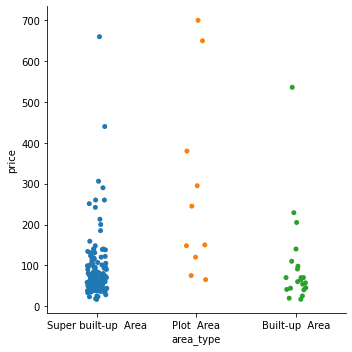

In [16]:
#sns.set(style="ticks", color_codes=True)
tips = pd.read_csv('df_bglr_155.csv')
sns.catplot(x="area_type", y="price", data=tips);

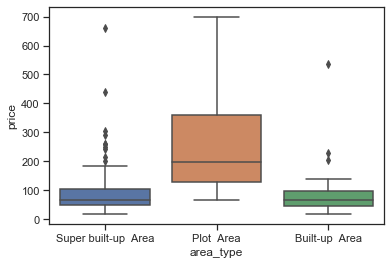

In [64]:
sns.boxplot(x="area_type", y="price", data=tips);

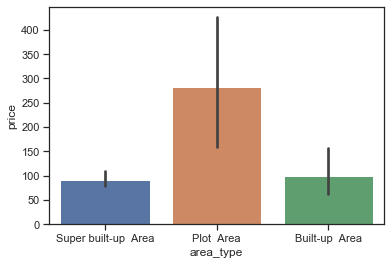

In [65]:
sns.barplot(x="area_type", y="price", data=tips);

### Visualizing Apprtment size vs price 

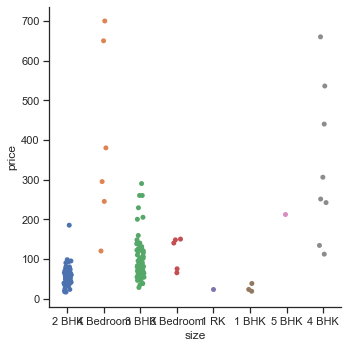

In [66]:
sns.catplot(x="size", y="price", data=tips);

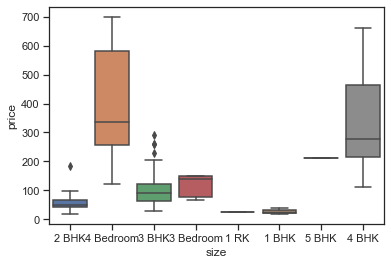

In [67]:
sns.boxplot(x="size", y="price", data=tips);

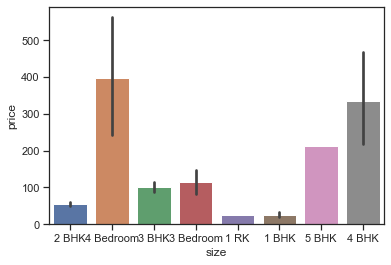

In [68]:
sns.barplot(x="size", y="price", data=tips);

## Plotting the Linear Regression line for future Price predictions 

In [21]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

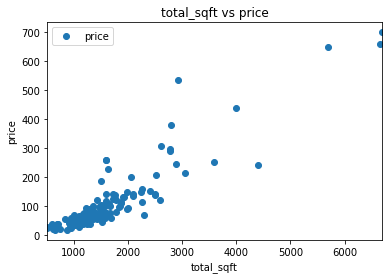

In [10]:
tips.plot(x='total_sqft', y='price', style='o')  
plt.title('total_sqft vs price')  
plt.xlabel('total_sqft')  
plt.ylabel('price')  
plt.show()

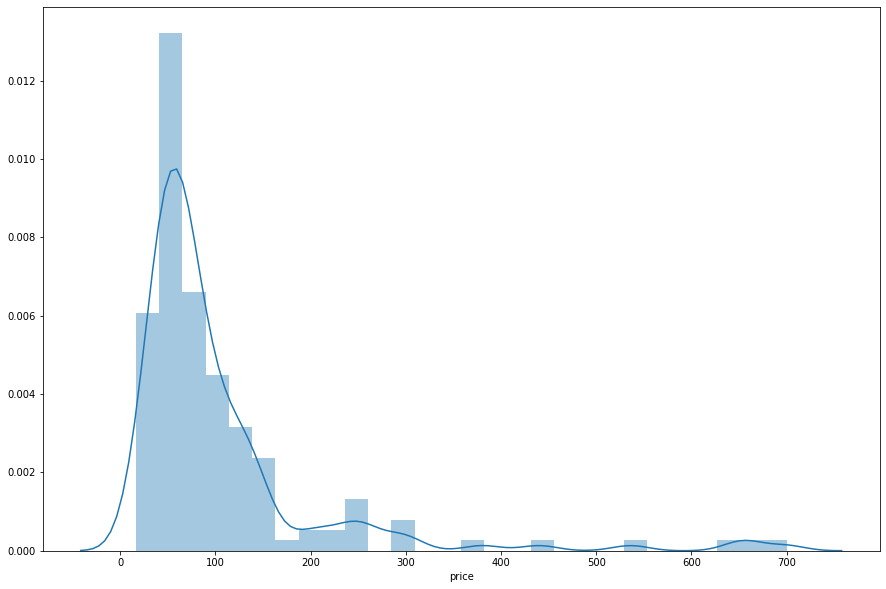

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_bglr_155['price'])

In [22]:
X=tips['total_sqft']
#print(X)
y=tips['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = LinearRegression()
est=regr.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

In [25]:
est.intercept_


array([-74.16807367])

In [26]:
est.coef_

array([[0.10938526]])

In [36]:
y_test_new=y_test.values.reshape(-1,1)
y_test_new

array([[ 93.  ],
       [ 28.  ],
       [ 44.  ],
       [ 75.  ],
       [ 98.  ],
       [140.  ],
       [260.  ],
       [ 58.  ],
       [ 40.  ],
       [ 75.  ],
       [105.  ],
       [ 90.  ],
       [242.  ],
       [ 43.76],
       [ 48.77],
       [ 57.39],
       [ 75.  ],
       [148.  ],
       [536.  ],
       [ 19.5 ],
       [123.  ],
       [380.  ],
       [ 60.  ],
       [ 33.  ],
       [ 16.5 ],
       [ 74.9 ],
       [ 79.99],
       [ 37.  ],
       [ 60.  ],
       [260.  ],
       [700.  ],
       [103.  ],
       [ 60.  ],
       [ 78.  ],
       [ 58.7 ],
       [ 65.  ],
       [ 17.  ],
       [ 50.  ],
       [ 60.9 ],
       [ 35.  ],
       [ 66.78],
       [ 43.  ],
       [ 65.  ],
       [ 38.  ],
       [229.  ],
       [ 52.  ],
       [122.  ],
       [139.  ],
       [ 78.  ],
       [ 60.  ],
       [ 99.  ],
       [ 25.  ]])

In [33]:
y_pred = regr.predict(X_test.values.reshape(-1,1))
print(y_pred)

[[ 59.61009487]
 [ 45.60878205]
 [ 57.09423397]
 [ 55.45345513]
 [ 73.39263717]
 [198.96691149]
 [100.84833652]
 [ 47.46833141]
 [ 25.04435386]
 [100.84833652]
 [107.4114519 ]
 [ 65.18874294]
 [406.58012808]
 [ 53.48452051]
 [ 51.73435641]
 [111.02116536]
 [100.84833652]
 [142.85227497]
 [245.23687493]
 [  7.87086861]
 [118.34997754]
 [232.11064417]
 [ 94.28522114]
 [ 31.93562501]
 [ 22.09095193]
 [107.95837818]
 [121.19399421]
 [  3.27668784]
 [ 44.07738846]
 [101.3952628 ]
 [657.40052093]
 [ 96.91046729]
 [ 57.42238974]
 [ 89.3628846 ]
 [ 98.22309037]
 [100.84833652]
 [ -3.06765703]
 [ 64.75120192]
 [ 84.44054807]
 [ 37.62365834]
 [ 63.65734935]
 [ 50.53111859]
 [ 57.09423397]
 [ 63.00103782]
 [105.22374678]
 [ 64.75120192]
 [117.80305126]
 [118.34997754]
 [ 89.90981088]
 [ 54.35960256]
 [108.50530447]
 [ 29.74791988]]


#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [40]:
from sklearn.metrics import r2_score
# we cant use CONFUSION MATRIX for continous variables we need a labels
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test_new)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test_new) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test_new) )

Mean absolute error: 36.17
Residual sum of squares (MSE): 4305.29
R2-score: 0.59


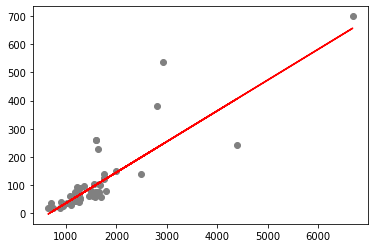

In [12]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red')
plt.show()

## Plotting the  Multiple Linear Regression line for future Price predictions

In [17]:
tips['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '1 BHK',
       '5 BHK', '4 BHK'], dtype=object)

In [18]:
tips['size'].replace({'2 BHK':1, '4 Bedroom':2, '3 BHK':3, '3 Bedroom':3, '1 RK':4, '1 BHK':4,'5 BHK':5, '4 BHK':2},inplace=True)

In [19]:
X = tips[[ 'balcony', 'bath','latitude',  'longitude', 'size']]
y = tips[['price','total_sqft']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train,y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ -9.68997413  75.58711509  -3.83106966  -1.56955879  -2.90953792]
 [-57.36504226 688.61413377 -22.68626206  -9.98660678  25.85417038]]


In [21]:
y_pred=regr.predict(X_test)

In [22]:
y_pred

array([[  70.54331914, 1240.55777187],
       [  55.14729697, 1235.50898155],
       [  64.90125781, 1207.53043326],
       [  60.86511298, 1183.21572829],
       [  70.58282276, 1240.7378609 ],
       [ 131.06640151, 1926.23428198],
       [ 128.04775085, 1908.31013861],
       [  69.9375857 , 1236.88841045],
       [  71.10064612, 1243.93766347],
       [ 140.79647604, 1983.7355939 ],
       [  54.80175431, 1235.19803507],
       [  70.65087947, 1241.2748092 ],
       [ 209.82498582, 2590.41917281],
       [  70.61592309, 1241.02678727],
       [  61.41869408, 1186.59789697],
       [ 121.55437777, 1869.82177866],
       [  45.3789614 , 1177.67614531],
       [ 215.99571829, 2670.07421718],
       [ 199.9131808 , 2531.76547276],
       [  70.68173299, 1241.38951771],
       [  55.45861   , 1237.40808532],
       [ 284.47186364, 3273.53149394],
       [ 121.21654014, 1867.81335217],
       [  80.60594643, 1300.21135114],
       [  -5.0336309 ,  552.09080873],
       [ 130.62053873, 19

In [26]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

TypeError: cannot convert the series to <class 'float'>

## Polynomial Regression implementation

Now, the question is: how we can fit our data on this equation while we have only x values, such as "total_sqft"? 
Well, we can create a few additional features: 1, $x$, and $x^2$.

__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, total_sqft. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = X_train[['total_sqft']]
train_y = y_train[['price']]

test_x =  X_test[['total_sqft']]
test_y =  y_test[['price']]


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000000e+00, 1.5300000e+03, 2.3409000e+06],
       [1.0000000e+00, 2.5110000e+03, 6.3051210e+06],
       [1.0000000e+00, 2.7850000e+03, 7.7562250e+06],
       [1.0000000e+00, 1.5000000e+03, 2.2500000e+06],
       [1.0000000e+00, 1.4860000e+03, 2.2081960e+06],
       [1.0000000e+00, 1.1400000e+03, 1.2996000e+06],
       [1.0000000e+00, 1.8700000e+03, 3.4969000e+06],
       [1.0000000e+00, 1.0250000e+03, 1.0506250e+06],
       [1.0000000e+00, 6.1000000e+02, 3.7210000e+05],
       [1.0000000e+00, 2.7700000e+03, 7.6729000e+06],
       [1.0000000e+00, 6.6520000e+03, 4.4249104e+07],
       [1.0000000e+00, 1.9750000e+03, 3.9006250e+06],
       [1.0000000e+00, 1.2400000e+03, 1.5376000e+06],
       [1.0000000e+00, 1.0560000e+03, 1.1151360e+06],
       [1.0000000e+00, 4.0000000e+03, 1.6000000e+07],
       [1.0000000e+00, 1.2820000e+03, 1.6435240e+06],
       [1.0000000e+00, 1.4990000e+03, 2.2470010e+06],
       [1.0000000e+00, 1.3650000e+03, 1.8632250e+06],
       [1.0000000e+00, 2.010

In [61]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[0.00000000e+00 7.18493535e-02 6.37019201e-06]]
Intercept:  [-35.06691692]


In [63]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 35.75
Residual sum of squares (MSE): 4546.37
R2-score: 0.60


## SVM Classifier

In [84]:
X = tips[[ 'balcony', 'bath','latitude',  'longitude', 'size','total_sqft']].values
y = tips[['price']].values
# X = np.asarray(X)
# y = np.asarray(y)


In [85]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
clf.fit(X_train, y_train) 

C:\Users\dmsss\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [100]:
y_pred=clf.predict(X_test)

In [101]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 77.09
Residual sum of squares (MSE): 18639.32
R2-score: -1.90


### NEGATIVE R2 score defines a worst fit of data

## Applying fully connected(Dense) Neural networks for regression

In [108]:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 165,761
Trainable params: 165,761
Non-trainable params: 0
_________________________________________________________________


In [109]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)


Train on 82 samples, validate on 21 samples
Epoch 1/500
82/82 [==============================] - 0s 2ms/step - loss: 91.7778 - mean_absolute_error: 91.7778 - val_loss: 34.7422 - val_mean_absolute_error: 34.7422
Epoch 2/500
82/82 [==============================] - 0s 85us/step - loss: 35.4493 - mean_absolute_error: 35.4493 - val_loss: 42.9943 - val_mean_absolute_error: 42.9943
Epoch 3/500
82/82 [==============================] - 0s 97us/step - loss: 47.4318 - mean_absolute_error: 47.4318 - val_loss: 32.2656 - val_mean_absolute_error: 32.2656
Epoch 4/500
82/82 [==============================] - 0s 122us/step - loss: 34.7709 - mean_absolute_error: 34.7709 - val_loss: 24.8143 - val_mean_absolute_error: 24.8143
Epoch 5/500
82/82 [==============================] - 0s 98us/step - loss: 36.4685 - mean_absolute_error: 36.4685 - val_loss: 27.5415 - val_mean_absolute_error: 27.5415
Epoch 6/500
82/82 [==============================] - 0s 109us/step - loss: 36.4216 - mean_absolute_error: 36.4216 - 

82/82 [==============================] - 0s 122us/step - loss: 20.0179 - mean_absolute_error: 20.0179 - val_loss: 23.3488 - val_mean_absolute_error: 23.3488
Epoch 98/500
82/82 [==============================] - 0s 122us/step - loss: 20.4918 - mean_absolute_error: 20.4918 - val_loss: 23.5518 - val_mean_absolute_error: 23.5518
Epoch 99/500
82/82 [==============================] - 0s 122us/step - loss: 20.1444 - mean_absolute_error: 20.1444 - val_loss: 28.2720 - val_mean_absolute_error: 28.2720
Epoch 100/500
82/82 [==============================] - 0s 122us/step - loss: 20.2446 - mean_absolute_error: 20.2446 - val_loss: 25.6332 - val_mean_absolute_error: 25.6332
Epoch 101/500
82/82 [==============================] - 0s 122us/step - loss: 20.9815 - mean_absolute_error: 20.9815 - val_loss: 22.8682 - val_mean_absolute_error: 22.8682
Epoch 102/500
82/82 [==============================] - 0s 109us/step - loss: 20.3444 - mean_absolute_error: 20.3444 - val_loss: 31.3199 - val_mean_absolute_error

82/82 [==============================] - 0s 122us/step - loss: 19.9765 - mean_absolute_error: 19.9765 - val_loss: 26.1248 - val_mean_absolute_error: 26.1248
Epoch 146/500
82/82 [==============================] - 0s 134us/step - loss: 19.0574 - mean_absolute_error: 19.0574 - val_loss: 28.0423 - val_mean_absolute_error: 28.0423
Epoch 147/500
82/82 [==============================] - 0s 109us/step - loss: 19.2337 - mean_absolute_error: 19.2337 - val_loss: 25.1644 - val_mean_absolute_error: 25.1644
Epoch 148/500
82/82 [==============================] - 0s 134us/step - loss: 19.9576 - mean_absolute_error: 19.9576 - val_loss: 25.8574 - val_mean_absolute_error: 25.8574
Epoch 149/500
82/82 [==============================] - 0s 109us/step - loss: 19.1191 - mean_absolute_error: 19.1191 - val_loss: 27.1117 - val_mean_absolute_error: 27.1117
Epoch 150/500
82/82 [==============================] - 0s 146us/step - loss: 19.2696 - mean_absolute_error: 19.2696 - val_loss: 25.1579 - val_mean_absolute_err

Epoch 193/500
82/82 [==============================] - 0s 122us/step - loss: 20.2173 - mean_absolute_error: 20.2173 - val_loss: 28.2610 - val_mean_absolute_error: 28.2610
Epoch 194/500
82/82 [==============================] - 0s 134us/step - loss: 18.9854 - mean_absolute_error: 18.9854 - val_loss: 27.1722 - val_mean_absolute_error: 27.1722
Epoch 195/500
82/82 [==============================] - 0s 122us/step - loss: 18.6338 - mean_absolute_error: 18.6338 - val_loss: 27.3973 - val_mean_absolute_error: 27.3973
Epoch 196/500
82/82 [==============================] - 0s 134us/step - loss: 18.7059 - mean_absolute_error: 18.7059 - val_loss: 27.4898 - val_mean_absolute_error: 27.4898
Epoch 197/500
82/82 [==============================] - 0s 109us/step - loss: 18.8638 - mean_absolute_error: 18.8638 - val_loss: 27.2181 - val_mean_absolute_error: 27.2181
Epoch 198/500
82/82 [==============================] - 0s 170us/step - loss: 19.0358 - mean_absolute_error: 19.0358 - val_loss: 27.4852 - val_mea

Epoch 241/500
82/82 [==============================] - 0s 158us/step - loss: 18.5666 - mean_absolute_error: 18.5666 - val_loss: 28.4837 - val_mean_absolute_error: 28.4837
Epoch 242/500
82/82 [==============================] - 0s 134us/step - loss: 18.9071 - mean_absolute_error: 18.9071 - val_loss: 27.5961 - val_mean_absolute_error: 27.5961
Epoch 243/500
82/82 [==============================] - 0s 134us/step - loss: 19.2294 - mean_absolute_error: 19.2294 - val_loss: 29.6786 - val_mean_absolute_error: 29.6786
Epoch 244/500
82/82 [==============================] - 0s 134us/step - loss: 19.0682 - mean_absolute_error: 19.0682 - val_loss: 27.9519 - val_mean_absolute_error: 27.9519
Epoch 245/500
82/82 [==============================] - 0s 109us/step - loss: 18.5913 - mean_absolute_error: 18.5913 - val_loss: 28.9348 - val_mean_absolute_error: 28.9348
Epoch 246/500
82/82 [==============================] - 0s 146us/step - loss: 18.5532 - mean_absolute_error: 18.5532 - val_loss: 26.9717 - val_mea

Epoch 289/500
82/82 [==============================] - 0s 134us/step - loss: 18.9596 - mean_absolute_error: 18.9596 - val_loss: 26.2490 - val_mean_absolute_error: 26.2490
Epoch 290/500
82/82 [==============================] - 0s 158us/step - loss: 20.6415 - mean_absolute_error: 20.6415 - val_loss: 28.3525 - val_mean_absolute_error: 28.3525
Epoch 291/500
82/82 [==============================] - 0s 134us/step - loss: 18.4919 - mean_absolute_error: 18.4919 - val_loss: 32.2812 - val_mean_absolute_error: 32.2812
Epoch 292/500
82/82 [==============================] - 0s 146us/step - loss: 18.8563 - mean_absolute_error: 18.8563 - val_loss: 28.2069 - val_mean_absolute_error: 28.2069
Epoch 293/500
82/82 [==============================] - 0s 109us/step - loss: 19.3345 - mean_absolute_error: 19.3345 - val_loss: 26.9355 - val_mean_absolute_error: 26.9355
Epoch 294/500
82/82 [==============================] - 0s 146us/step - loss: 19.1732 - mean_absolute_error: 19.1732 - val_loss: 32.3140 - val_mea

Epoch 337/500
82/82 [==============================] - 0s 134us/step - loss: 19.1230 - mean_absolute_error: 19.1230 - val_loss: 27.8039 - val_mean_absolute_error: 27.8039
Epoch 338/500
82/82 [==============================] - 0s 171us/step - loss: 19.0859 - mean_absolute_error: 19.0859 - val_loss: 33.2302 - val_mean_absolute_error: 33.2302
Epoch 339/500
82/82 [==============================] - 0s 146us/step - loss: 19.2396 - mean_absolute_error: 19.2396 - val_loss: 29.7010 - val_mean_absolute_error: 29.7010
Epoch 340/500
82/82 [==============================] - 0s 134us/step - loss: 18.1810 - mean_absolute_error: 18.1810 - val_loss: 25.6431 - val_mean_absolute_error: 25.6431
Epoch 341/500
82/82 [==============================] - 0s 122us/step - loss: 19.4049 - mean_absolute_error: 19.4049 - val_loss: 27.9178 - val_mean_absolute_error: 27.9178
Epoch 342/500
82/82 [==============================] - 0s 146us/step - loss: 18.4134 - mean_absolute_error: 18.4134 - val_loss: 29.5131 - val_mea

Epoch 385/500
82/82 [==============================] - 0s 134us/step - loss: 18.0569 - mean_absolute_error: 18.0569 - val_loss: 26.8851 - val_mean_absolute_error: 26.8851
Epoch 386/500
82/82 [==============================] - 0s 159us/step - loss: 20.3534 - mean_absolute_error: 20.3534 - val_loss: 24.5719 - val_mean_absolute_error: 24.5719
Epoch 387/500
82/82 [==============================] - 0s 182us/step - loss: 19.8704 - mean_absolute_error: 19.8704 - val_loss: 32.8772 - val_mean_absolute_error: 32.8772
Epoch 388/500
82/82 [==============================] - 0s 182us/step - loss: 18.5857 - mean_absolute_error: 18.5857 - val_loss: 31.4083 - val_mean_absolute_error: 31.4083
Epoch 389/500
82/82 [==============================] - 0s 158us/step - loss: 18.0089 - mean_absolute_error: 18.0089 - val_loss: 28.7668 - val_mean_absolute_error: 28.7668
Epoch 390/500
82/82 [==============================] - 0s 182us/step - loss: 18.2051 - mean_absolute_error: 18.2051 - val_loss: 30.2935 - val_mea

Epoch 480/500
82/82 [==============================] - 0s 146us/step - loss: 17.7625 - mean_absolute_error: 17.7626 - val_loss: 32.5568 - val_mean_absolute_error: 32.5568
Epoch 481/500
82/82 [==============================] - 0s 170us/step - loss: 18.1777 - mean_absolute_error: 18.1777 - val_loss: 35.9953 - val_mean_absolute_error: 35.9953
Epoch 482/500
82/82 [==============================] - 0s 182us/step - loss: 18.4402 - mean_absolute_error: 18.4402 - val_loss: 30.2871 - val_mean_absolute_error: 30.2871
Epoch 483/500
82/82 [==============================] - 0s 158us/step - loss: 17.9110 - mean_absolute_error: 17.9110 - val_loss: 28.3965 - val_mean_absolute_error: 28.3965
Epoch 484/500
82/82 [==============================] - 0s 146us/step - loss: 18.2207 - mean_absolute_error: 18.2207 - val_loss: 31.0378 - val_mean_absolute_error: 31.0378
Epoch 485/500
82/82 [==============================] - 0s 170us/step - loss: 17.5153 - mean_absolute_error: 17.5153 - val_loss: 30.4333 - val_mea

In [110]:
NN_model.save_weights("model.h5")

In [ ]:
model = create_model()

# Restore the weights
model.load_weights('model.h5')

In [112]:
y_pred=NN_model.predict(X_test)

In [113]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 38.46
Residual sum of squares (MSE): 4735.31
R2-score: 0.69


#### Predictions for other sets of columns possible

In [209]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [231]:
X=pd.DataFrame(np.c_[df_bglr_155['balcony'],df_bglr_155['bath']],columns=['balcony','bath'])
y = pd.DataFrame(np.c_[df_bglr_155['price']],columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [236]:
y.shape

(155, 1)

In [239]:
y_pred=regr.predict(X_test)
print(y_pred)

[[ 63.27152752]
 [ 55.99936581]
 [ 55.99936581]
 [ 55.99936581]
 [ 63.27152752]
 [137.50497391]
 [137.50497391]
 [ 63.27152752]
 [ 63.27152752]
 [144.77713562]
 [ 55.99936581]
 [ 63.27152752]
 [219.01058202]
 [ 63.27152752]
 [ 55.99936581]
 [130.2328122 ]
 [ 48.72720409]
 [226.28274373]
 [211.73842031]
 [ 63.27152752]
 [ 55.99936581]
 [300.51619013]
 [130.2328122 ]
 [ 70.54368923]
 [-18.23408059]
 [137.50497391]
 [137.50497391]
 [ 55.99936581]
 [ 48.72720409]
 [137.50497391]
 [389.29395995]
 [144.77713562]
 [ 55.99936581]
 [ 63.27152752]
 [137.50497391]
 [137.50497391]
 [-18.23408059]
 [ 63.27152752]
 [130.2328122 ]
 [ 63.27152752]
 [ 55.99936581]
 [ 48.72720409]
 [137.50497391]
 [137.50497391]
 [137.50497391]
 [ 55.99936581]
 [144.77713562]
 [137.50497391]
 [ 63.27152752]
 [ 63.27152752]
 [144.77713562]
 [ 63.27152752]]


## Visualizing The Data

In [ ]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    df['total_arrests'],
    # with the labels being officer names
    labels=df['officer_name'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [6]:
# create map of New York using latitude and longitude values
map_bnglr = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_bglr_155['latitude'], df_bglr_155['longitude'], df_bglr_155['society'], df_bglr_155['location']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bnglr)  
    
map_bnglr

In [5]:
# create map of New York using latitude and longitude values
map_bnglr = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng,neighborhood in zip(df_dad['Latitude'], df_dad['Longitude'],df_dad['Location']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bnglr)  
    
map_bnglr

In [7]:
CLIENT_ID = 'S1HVDAACCHCDZCPEP5HTLOLEJU2TURXB3GNZ4DJ0NFCAKK5F' # your Foursquare ID
CLIENT_SECRET = 'RW2FY0ZSEH1YA11NOTDFQEKFYEYMJNDJVWORKBZDXYV1OH23' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S1HVDAACCHCDZCPEP5HTLOLEJU2TURXB3GNZ4DJ0NFCAKK5F
CLIENT_SECRET:RW2FY0ZSEH1YA11NOTDFQEKFYEYMJNDJVWORKBZDXYV1OH23


In [8]:
neighborhood_latitude = df_bglr_155.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df_bglr_155.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = df_bglr_155.loc[0, 'location'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Electronic City Phase II are 12.8468545, 77.6769267.


In [11]:

LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=S1HVDAACCHCDZCPEP5HTLOLEJU2TURXB3GNZ4DJ0NFCAKK5F&client_secret=RW2FY0ZSEH1YA11NOTDFQEKFYEYMJNDJVWORKBZDXYV1OH23&v=20180605&ll=12.8468545,77.6769267&radius=500&limit=50'

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e85ad54216785001b02bbf0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 12.851354504500003,
    'lng': 77.68153362366434},
   'sw': {'lat': 12.842354495499995, 'lng': 77.67231977633566}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e0855c8b61c60b0454a7cbb',
       'name': 'TCS Think Campus',
       'location': {'address': '#42, Electronic City',
        'crossStreet': 'Phase II',
        'lat': 12.847598224906433,
        'lng': 77.6791380938702,
        'labeledLatLngs': [{'la

In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.shape

(5, 4)

In [14]:
nearby_venues 

,name,categories,lat,lng
0,TCS Think Campus,Coworking Space,12.847598,77.679138
1,TCS Think Campus Ground,Basketball Court,12.848344,77.679267
2,"Mint-The Kitchen, Think Campus.",Vegetarian / Vegan Restaurant,12.848941,77.678960
3,Foodies Express,Diner,12.847623,77.680726
4,Aastha,Indian Restaurant,12.849795,77.679391


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
banglore_venues=pd.read_csv('banglore_venues.csv')

In [21]:
# type your answer here

banglore_venues = getNearbyVenues(names=df_bglr_155['location'],
                                   latitudes=df_bglr_155['latitude'],
                                   longitudes=df_bglr_155['longitude']
                                  )



Electronic City Phase II
Chikka Tirupathi
Lingadheeranahalli
Whitefield
Whitefield
7th Phase JP Nagar
Sarjapur
Mysore Road
Bisuvanahalli
Raja Rajeshwari Nagar
Ramakrishnappa Layout
Binny Pete
Thanisandra
 Thanisandra
Electronic City
Ramagondanahalli
Electronic City
Bisuvanahalli
Hebbal
Raja Rajeshwari Nagar
Kanakpura Road
Kundalahalli
Sarjapur  Road
Ganga Nagar
Doddathoguru
Whitefield
Adarsh Nagar
Bhoganhalli
Whitefield
Lakshminarayana Pura
Yelahanka
Begur Road
Ramakrishnappa Layout
Ganga Nagar
Whitefield
Varthur
Gunjur
Begur Road
Hegde Nagar
Haralur Road
Hennur Road
Cholanayakanahalli
Kodanda Reddy Layout
Yelahanka
EPIP Zone
Dasanapura
Kasavanhalli
Sanjay nagar
Thanisandra
Kengeri
Yeshwanthpur
Chandapura
Kothanur
Green View Layout
Shantiniketan Layout
Rajaji Nagar
Devanahalli
Byatarayanapura
Whitefield
Electronic City
Sarjapur  Road
Kengeri
Thanisandra
Akshaya Nagar
Devanahalli
LB Shastri Nagar
Hormavu
Peenya
Sarjapur
Electronic City
Kudlu Gate
Kanakpura Road
Devanahalli
Chandra Layou

In [102]:
#print(banglore_venues.shape)
#banglore_venues.to_csv("banglore_venues.csv")
banglore_venues=pd.read_csv('banglore_venues.csv')

In [23]:
banglore_venues['Venue Category'].unique()

array(['Coworking Space', 'Basketball Court', 'Café',
       'Vegetarian / Vegan Restaurant', 'Indian Restaurant', 'Diner',
       'Restaurant', 'Historic Site', 'Pub', 'Burger Joint',
       'Ice Cream Shop', 'Steakhouse', 'Snack Place',
       'Punjabi Restaurant', 'Chettinad Restaurant',
       'North Indian Restaurant', 'Mediterranean Restaurant',
       'Coffee Shop', 'Liquor Store', 'Seafood Restaurant',
       'Sandwich Place', 'Department Store', 'Farmers Market', 'Lounge',
       'Pizza Place', 'General Entertainment', 'Fast Food Restaurant',
       'Gym', 'Clothing Store', 'Donut Shop', 'Food Court',
       'Bengali Restaurant', 'Park', 'Wine Bar', 'Beer Bar',
       'Breakfast Spot', 'French Restaurant', 'Cocktail Bar', 'Theater',
       'Middle Eastern Restaurant', 'Vietnamese Restaurant',
       'Italian Restaurant', 'Portuguese Restaurant', 'Korean Restaurant',
       'Thai Restaurant', 'Playground', 'Bar', 'Bus Stop',
       'Chinese Restaurant', 'IT Services', 'Train St

In [14]:
FOURSQUARE_SEARCH_URL = 'https://api.foursquare.com/v2/venues/search?'
# SEARCH VENUES BY CATEGORY

# Dataframe : venue_id_recover 
# - store venue id to recover failed venues id score retrieval later if foursquare limit is exceeded when getting score.
venue_id_rcols = ['VenueID']
venue_id_recover = pd.DataFrame(columns=venue_id_rcols)

def getVenuesByCategory(names, latitudes, longitudes, categoryID, radius=500):
    global CLIENT_ID
    global CLIENT_SECRET
    global FOURSQUARE_EXPLORE_URL
    global FOURSQUARE_SEARCH_URL
    global VERSION
    global LIMIT
    venue_columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude','Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    venue_DF = pd.DataFrame(columns=venue_columns)
    print("[#Start getVenuesByCategory]")
    for name, lat, lng in zip(names, latitudes, longitudes):
        #cyclefsk2()
        print(name,",",end='')
        #print('getVenuesByCategory',categoryID,name) ; # DEBUG: be quiet
        # create the API request URL
        url = '{}client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            FOURSQUARE_SEARCH_URL,CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT,categoryID)
        # make the GET request
        results = requests.get(url).json()
        # Populate dataframe with the category venue results
        # Extracting JSON  data values
        
        for jsonSub in results['response']['venues']:
            #print(jsonSub)
            # JSON Results may not be in expected format or incomplete data, in that case, skip!
            ven_id = 0
            try:
                # If there are any issue with a restaurant, retry or ignore and continue
                # Get location details
                ven_id   = jsonSub['id']
                ven_cat  = jsonSub['categories'][0]['pluralName']
                ven_CID  = jsonSub['categories'][0]['id']
                ven_name = jsonSub['name']
                ven_lat  = jsonSub['location']['lat']
                ven_lng  = jsonSub['location']['lng']
                venue_DF = venue_DF.append({
                    'Town'      : name,
                    'Town Latitude' : lat,
                    'Town Longitude': lng,
                    'VenueID'   : ven_id,
                    'VenueName' : ven_name,
                    'score'     : 'nan',
                    'category'  : ven_cat,
                    'catID'     : ven_CID,
                    'latitude'  : ven_lat,
                    'longitude' : ven_lng}, ignore_index=True)
            except:
                continue
    # END OF LOOP, return.
    print("\n[#Done getVenuesByCategory]")
    return(venue_DF)

In [15]:
venue_columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude','Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
banglore_town_venues = pd.DataFrame(columns=venue_columns)

In [16]:
if(0):
    categoryID = "4d4b7105d754a06377d81259"
    town_names = ['Electronic City Phase II']
    lat_list   = [12.846854]
    lng_list   = [77.676927]
    tmp = getVenuesByCategory(names=town_names,latitudes=lat_list,longitudes=lng_list,categoryID=categoryID)
    banglore_town_venues = pd.concat([banglore_town_venues,tmp], ignore_index=True)

In [17]:
banglore_town_venues


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [18]:
banglore_venues.groupby('Neighborhood').count()

,Unnamed: 0,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Thanisandra,15,15,15,15,15,15,15
7th Phase JP Nagar,42,42,42,42,42,42,42
Abbigere,9,9,9,9,9,9,9
Akshaya Nagar,46,46,46,46,46,46,46
Anandapura,47,47,47,47,47,47,47
BCMC Layout,4,4,4,4,4,4,4
Badavala Nagar,6,6,6,6,6,6,6
Bannerghatta Road,8,8,8,8,8,8,8
Begur Road,1,1,1,1,1,1,1


In [19]:
# one hot encoding
banglore_onehot = pd.get_dummies(banglore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
banglore_onehot['Neighborhood'] = banglore_venues['Neighborhood'] 
# banglore_onehot['Neighborhood Latitude'] = banglore_venues['Neighborhood Latitude'] 
# banglore_onehot['Neighborhood Longitude'] = banglore_venues['Neighborhood Longitude'] 
# move neighborhood column to the first column
fixed_columns = [banglore_onehot.columns[-1]] + list(banglore_onehot.columns[:-1])
banglore_onehot = banglore_onehot[fixed_columns]

banglore_onehot.head()

,Women's Store,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,...,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
banglore_grouped = banglore_onehot.groupby('Neighborhood').mean().reset_index()
banglore_grouped

,Neighborhood,Women's Store,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Wine Bar
0,Thanisandra,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
1,7th Phase JP Nagar,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.02381,0.000000,0.02381
2,Abbigere,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
3,Akshaya Nagar,0.000000,0.000000,0.0,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.021739,0.00000,0.000000,0.00000
4,Anandapura,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,...,0.000000,0.0,0.00,0.021277,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
5,BCMC Layout,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
6,Badavala Nagar,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
7,Bannerghatta Road,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
8,Begur Road,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
9,Bisuvanahalli,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000


In [21]:
num_top_venues = 10

for hood in banglore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = banglore_grouped[banglore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Thanisandra----
                venue  freq
0  Chinese Restaurant  0.20
1                Café  0.13
2   Convenience Store  0.13
3        Liquor Store  0.07
4      Ice Cream Shop  0.07
5              Bakery  0.07
6         Bus Station  0.07
7         Pizza Place  0.07
8   Indian Restaurant  0.07
9    Department Store  0.07


----7th Phase JP Nagar----
               venue  freq
0        Pizza Place  0.10
1                Pub  0.10
2               Café  0.07
3  Indian Restaurant  0.07
4       Cocktail Bar  0.07
5                Bar  0.05
6           Bus Stop  0.05
7  French Restaurant  0.05
8        Coffee Shop  0.05
9    Thai Restaurant  0.05


----Abbigere----
                venue  freq
0        Liquor Store  0.22
1    Department Store  0.11
2               Hotel  0.11
3                Café  0.11
4                 Bar  0.11
5    Asian Restaurant  0.11
6       Bowling Alley  0.11
7  Italian Restaurant  0.11
8         Pizza Place  0.00
9       Movie Theater  0.00


----Akshaya Naga

                            venue  freq
0               Indian Restaurant  0.29
1                 Coworking Space  0.14
2                            Café  0.14
3   Vegetarian / Vegan Restaurant  0.14
4                           Diner  0.14
5                Basketball Court  0.14
6                   Movie Theater  0.00
7  Multicuisine Indian Restaurant  0.00
8                       Multiplex  0.00
9                     Music Venue  0.00


----Electronics City Phase 1----
                            venue  freq
0               Indian Restaurant  0.25
1                     Supermarket  0.25
2                            Lake  0.25
3                          Bakery  0.25
4                   Women's Store  0.00
5                       Nightclub  0.00
6               Mobile Phone Shop  0.00
7                 Motorcycle Shop  0.00
8                   Movie Theater  0.00
9  Multicuisine Indian Restaurant  0.00


----Ganga Nagar----
                            venue  freq
0               Indian 

                            venue  freq
0               Indian Restaurant  0.25
1                            Park  0.25
2                       Juice Bar  0.25
3                        Tea Room  0.25
4                       Nightclub  0.00
5               Mobile Phone Shop  0.00
6                 Motorcycle Shop  0.00
7                   Movie Theater  0.00
8  Multicuisine Indian Restaurant  0.00
9                       Multiplex  0.00


----Kammasandra----
                            venue  freq
0               Indian Restaurant  0.25
1                     Candy Store  0.25
2                          Bakery  0.25
3                            Café  0.25
4           Performing Arts Venue  0.00
5                        Pharmacy  0.00
6                 Motorcycle Shop  0.00
7                   Movie Theater  0.00
8  Multicuisine Indian Restaurant  0.00
9                       Multiplex  0.00


----Kanakpura Road----
                    venue  freq
0       Indian Restaurant  0.14
1    Fast

                            venue  freq
0                Department Store   0.2
1                      Food Court   0.2
2               German Restaurant   0.2
3      Tourist Information Center   0.2
4                Business Service   0.2
5                    Noodle House   0.0
6                   Movie Theater   0.0
7  Multicuisine Indian Restaurant   0.0
8                       Multiplex   0.0
9                     Music Venue   0.0


----Sarjapur----
                            venue  freq
0              Seafood Restaurant   0.2
1                  Breakfast Spot   0.2
2                     IT Services   0.2
3            Fast Food Restaurant   0.2
4                 Badminton Court   0.2
5                   Women's Store   0.0
6                   Movie Theater   0.0
7  Multicuisine Indian Restaurant   0.0
8                       Multiplex   0.0
9                     Music Venue   0.0


----Sarjapur  Road----
                     venue  freq
0                     Café  0.12
1        I

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = banglore_grouped['Neighborhood']

for ind in np.arange(banglore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(banglore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Thanisandra,Chinese Restaurant,Convenience Store,Café,Bakery,Indian Restaurant,Liquor Store,Dessert Shop,Department Store,Pizza Place,Bus Station
1,7th Phase JP Nagar,Pub,Pizza Place,Café,Cocktail Bar,Indian Restaurant,French Restaurant,Bus Stop,Bar,Coffee Shop,Thai Restaurant
2,Abbigere,Liquor Store,Department Store,Asian Restaurant,Bar,Café,Bowling Alley,Italian Restaurant,Hotel,Diner,Falafel Restaurant
3,Akshaya Nagar,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Korean Restaurant,Brewery,Restaurant,BBQ Joint,Coffee Shop,Electronics Store,Café
4,Anandapura,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Burger Joint,Italian Restaurant,Electronics Store,Sandwich Place,Restaurant
5,BCMC Layout,Indian Restaurant,Coffee Shop,Italian Restaurant,Bus Station,Wine Bar,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market
6,Badavala Nagar,Karnataka Restaurant,Indian Sweet Shop,Fast Food Restaurant,Resort,Metro Station,Pizza Place,Department Store,Dessert Shop,Flea Market,Farmers Market
7,Bannerghatta Road,Indian Restaurant,Restaurant,Breakfast Spot,Lighthouse,Multicuisine Indian Restaurant,Bakery,Café,Wine Bar,Fast Food Restaurant,Farmers Market
8,Begur Road,ATM,Wine Bar,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
9,Bisuvanahalli,Pharmacy,Hotel,Pizza Place,Indian Restaurant,Food Truck,Seafood Restaurant,Karnataka Restaurant,Fast Food Restaurant,Gas Station,Restaurant


In [24]:
neighborhoods_venues_sorted['Neighborhood Latitude'] = banglore_venues['Neighborhood Latitude'].astype(float)
neighborhoods_venues_sorted['Neighborhood Longitude'] = banglore_venues['Neighborhood Longitude'].astype(float)


In [25]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood Latitude,Neighborhood Longitude
0,Thanisandra,Chinese Restaurant,Convenience Store,Café,Bakery,Indian Restaurant,Liquor Store,Dessert Shop,Department Store,Pizza Place,Bus Station,12.846854,77.676927
1,7th Phase JP Nagar,Pub,Pizza Place,Café,Cocktail Bar,Indian Restaurant,French Restaurant,Bus Stop,Bar,Coffee Shop,Thai Restaurant,12.846854,77.676927
2,Abbigere,Liquor Store,Department Store,Asian Restaurant,Bar,Café,Bowling Alley,Italian Restaurant,Hotel,Diner,Falafel Restaurant,12.846854,77.676927
3,Akshaya Nagar,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Korean Restaurant,Brewery,Restaurant,BBQ Joint,Coffee Shop,Electronics Store,Café,12.846854,77.676927
4,Anandapura,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Burger Joint,Italian Restaurant,Electronics Store,Sandwich Place,Restaurant,12.846854,77.676927
5,BCMC Layout,Indian Restaurant,Coffee Shop,Italian Restaurant,Bus Station,Wine Bar,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,12.846854,77.676927
6,Badavala Nagar,Karnataka Restaurant,Indian Sweet Shop,Fast Food Restaurant,Resort,Metro Station,Pizza Place,Department Store,Dessert Shop,Flea Market,Farmers Market,12.846854,77.676927
7,Bannerghatta Road,Indian Restaurant,Restaurant,Breakfast Spot,Lighthouse,Multicuisine Indian Restaurant,Bakery,Café,Wine Bar,Fast Food Restaurant,Farmers Market,25.709878,32.658512
8,Begur Road,ATM,Wine Bar,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,25.709878,32.658512
9,Bisuvanahalli,Pharmacy,Hotel,Pizza Place,Indian Restaurant,Food Truck,Seafood Restaurant,Karnataka Restaurant,Fast Food Restaurant,Gas Station,Restaurant,12.911623,77.638862


In [28]:
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()

Indian Restaurant          25
Coffee Shop                 4
Pharmacy                    3
South Indian Restaurant     3
Restaurant                  3
Café                        3
Bakery                      2
Platform                    2
Ice Cream Shop              2
Fast Food Restaurant        2
Hotel                       2
Bowling Alley               1
Convenience Store           1
Food Truck                  1
ATM                         1
Chinese Restaurant          1
Electronics Store           1
Pub                         1
Karnataka Restaurant        1
Dog Run                     1
University                  1
Badminton Court             1
Bus Station                 1
Business Service            1
Kitchen Supply Store        1
Clothing Store              1
Park                        1
Pizza Place                 1
Sporting Goods Shop         1
Breakfast Spot              1
Liquor Store                1
IT Services                 1
Auto Garage                 1
Name: 1st 

In [26]:
from sklearn.cluster import KMeans

In [27]:
banglore_grouped.head()


,Neighborhood,Women's Store,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Wine Bar
0,Thanisandra,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.00000
1,7th Phase JP Nagar,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.02381,0.0,0.02381
2,Abbigere,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.111111,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.00000
3,Akshaya Nagar,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.021739,0.00000,0.0,0.00000
4,Anandapura,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.021277,...,0.0,0.0,0.0,0.021277,0.0,0.0,0.000000,0.00000,0.0,0.00000


In [28]:
# set number of clusters
kclusters = 10

banglore_grouped_clustering = banglore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=42).fit(banglore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 
#print(neighborhoods_venues_sorted)

array([3, 3, 0, 3, 3, 5, 3, 5, 7, 3, 5, 3, 3, 5, 3, 1, 6, 9, 3, 5, 3, 3,
       3, 5, 5, 2, 0, 5, 5, 3, 3, 5, 5, 0, 0, 5, 5, 3, 0, 8, 2, 0, 5, 5,
       3, 3, 5, 4, 1, 5, 2, 0, 2, 3, 5, 5, 3, 0, 3, 3, 5, 3, 3, 3, 3, 0,
       0, 0, 4, 0, 4, 3, 3])

In [29]:
banglore_merged.head()

,Unnamed: 0,Unnamed: 0.1,area_type,availability,balcony,bath,latitude,location,longitude,price,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,0,Super built-up Area,19-Dec,1.0,2.0,12.846854,Electronic City Phase II,77.676927,39.07,...,Indian Restaurant,Coworking Space,Vegetarian / Vegan Restaurant,Basketball Court,Diner,Café,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant
1,1,1,Plot Area,Ready To Move,3.0,5.0,12.895768,Chikka Tirupathi,77.867101,120.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,Super built-up Area,Ready To Move,1.0,3.0,12.580537,Lingadheeranahalli,77.333067,95.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5,Super built-up Area,Ready To Move,1.0,2.0,25.709878,Whitefield,32.658512,38.00,...,Indian Restaurant,Café,Restaurant,Department Store,Fast Food Restaurant,Bakery,Pub,Coffee Shop,Sandwich Place,Ice Cream Shop
4,4,11,Plot Area,Ready To Move,3.0,5.0,12.911623,Whitefield,77.638862,295.00,...,Indian Restaurant,Café,Restaurant,Department Store,Fast Food Restaurant,Bakery,Pub,Coffee Shop,Sandwich Place,Ice Cream Shop


In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

banglore_merged = df_bglr_155

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
banglore_merged = banglore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='location')

banglore_merged.drop(['Unnamed: 0'],axis=1) # check the last columns!

,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,...,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood Latitude,Neighborhood Longitude
0,Super built-up Area,19-Dec,1.0,2.0,12.846854,Electronic City Phase II,77.676927,39.07,2 BHK,Coomee,...,Vegetarian / Vegan Restaurant,Basketball Court,Diner,Café,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,12.911623,77.638862
1,Plot Area,Ready To Move,3.0,5.0,12.895768,Chikka Tirupathi,77.867101,120.00,4 Bedroom,Theanmp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Super built-up Area,Ready To Move,1.0,3.0,12.580537,Lingadheeranahalli,77.333067,95.00,3 BHK,Soiewre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,1.0,2.0,25.709878,Whitefield,32.658512,38.00,2 BHK,DuenaTa,...,Restaurant,Department Store,Fast Food Restaurant,Bakery,Pub,Coffee Shop,Sandwich Place,Ice Cream Shop,51.461952,-0.159617
4,Plot Area,Ready To Move,3.0,5.0,12.911623,Whitefield,77.638862,295.00,4 Bedroom,Prrry M,...,Restaurant,Department Store,Fast Food Restaurant,Bakery,Pub,Coffee Shop,Sandwich Place,Ice Cream Shop,51.461952,-0.159617
5,Super built-up Area,Ready To Move,1.0,2.0,51.461952,7th Phase JP Nagar,-0.159617,38.00,2 BHK,Shncyes,...,Café,Cocktail Bar,Indian Restaurant,French Restaurant,Bus Stop,Bar,Coffee Shop,Thai Restaurant,12.846854,77.676927
6,Plot Area,Ready To Move,2.0,3.0,12.977895,Sarjapur,77.516479,148.00,3 Bedroom,Skityer,...,Fast Food Restaurant,Seafood Restaurant,Badminton Court,Eastern European Restaurant,Food,Flea Market,Farmers Market,Falafel Restaurant,51.461952,-0.159617
7,Super built-up Area,Ready To Move,2.0,2.0,12.917657,Mysore Road,77.483757,73.50,2 BHK,PrntaEn,...,Dry Cleaner,Train Station,Café,ATM,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,51.461952,-0.159617
8,Super built-up Area,Ready To Move,2.0,3.0,13.054713,Bisuvanahalli,77.633926,48.00,3 BHK,Prityel,...,Pizza Place,Indian Restaurant,Food Truck,Seafood Restaurant,Karnataka Restaurant,Fast Food Restaurant,Gas Station,Restaurant,12.911623,77.638862
9,Super built-up Area,Ready To Move,3.0,3.0,12.936439,Raja Rajeshwari Nagar,77.666984,60.00,3 BHK,GrrvaGr,...,Breakfast Spot,Badminton Court,Indian Restaurant,Restaurant,Food Court,Food,Sandwich Place,Fast Food Restaurant,51.461952,-0.159617


In [83]:
banglore_merged.to_csv("banglore_merged2.csv")


In [59]:
#banglore_merged.drop(banglore_merged.loc[banglore_merged['1st Most Common Venue']==np.NaN].index, inplace=True)
banglore_merged_new = banglore_merged_new.dropna()

In [38]:
#banglore_merged=banglore_merged.reset_index()
banglore_merged['Cluster Labels'].dropna(inplace=True)

In [39]:
banglore_merged.to_csv('banglore_merged.csv')
#banglore_merged_final=pd.read_csv('banglore_merged_final.csv')

In [46]:
banglore_merged.dropna(inplace=True)

In [49]:
banglore_merged
banglore_merged.to_csv('banglore_merged.csv')


In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(banglore_merged['latitude'], banglore_merged['longitude'], banglore_merged['location'], banglore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## So where Can You establish a New "Restaurant" with very minimal Competition? And Available to Move Right Away

In [76]:
best_places_for_restaurant = banglore_merged[(~banglore_merged["1st Most Common Venue"].str.contains('Restaurant'))&(~banglore_merged["2nd Most Common Venue"].str.contains('Restaurant'))&(~banglore_merged["3rd Most Common Venue"].str.contains('Restaurant'))&(~banglore_merged["1st Most Common Venue"].str.contains('Food'))&(~banglore_merged["2nd Most Common Venue"].str.contains('Food'))&(~banglore_merged["3rd Most Common Venue"].str.contains('Food'))&(~banglore_merged["1st Most Common Venue"].str.contains('Pizza'))&(~banglore_merged["2nd Most Common Venue"].str.contains('Pizza'))&(~banglore_merged["3rd Most Common Venue"].str.contains('Pizza'))]


In [77]:
best_places_for_restaurant=best_places_for_restaurant.loc[best_places_for_restaurant['availability'] == 'Ready To Move']
best_places_for_restaurant=best_places_for_restaurant.sort_values("price")
#best_places_for_restaurant.to_csv("best_places_for_restaurant.csv")

In [78]:
best_places_for_restaurant.drop(['Unnamed: 0'],axis=1,inplace=True)

In [79]:
pd.set_option('display.max_columns', None)
best_places_for_restaurant

,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,total_sqft,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood Latitude,Neighborhood Longitude
125,Super built-up Area,Ready To Move,2.0,2.0,12.922544,Nobo Nagar,77.663343,45.0,2 BHK,VRaceer,1200,0.0,Bowling Alley,Hotel,Liquor Store,Bar,Asian Restaurant,Eastern European Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,51.461952,-0.159617
54,Super built-up Area,Ready To Move,2.0,2.0,12.956232,Shantiniketan Layout,77.605888,50.0,2 BHK,Maest N,1200,0.0,Sporting Goods Shop,Hotel,Candy Store,Cosmetics Shop,Department Store,Eastern European Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,51.461952,-0.159617
98,Super built-up Area,Ready To Move,1.0,2.0,14.077157,Choodasandra,75.212456,50.0,2 BHK,GRhtiru,1115,1.0,Platform,Wine Bar,Dry Cleaner,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Eastern European Restaurant,12.911623,77.638862
47,Built-up Area,Ready To Move,2.0,2.0,12.869978,Sanjay nagar,77.653460,70.0,2 BHK,Saenti,1000,3.0,Business Service,Department Store,Tourist Information Center,Food Court,German Restaurant,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,51.461952,-0.159617
129,Built-up Area,Ready To Move,0.0,2.0,12.910746,Somasundara Palya,77.572816,70.0,3 BHK,Srhts P,2300,0.0,Electronics Store,Hotel,Breakfast Spot,Mobile Phone Shop,Liquor Store,Buffet,Metro Station,Wine Bar,Flea Market,Fast Food Restaurant,51.461952,-0.159617
66,Super built-up Area,Ready To Move,1.0,2.0,13.036772,Hormavu,77.654948,78.0,2 BHK,SyidaCr,1500,0.0,Coffee Shop,Garden Center,Sports Club,Pharmacy,ATM,Historic Site,Donut Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,12.911623,77.638862
83,Super built-up Area,Ready To Move,3.0,2.0,13.036773,JP Nagar,77.654948,82.0,3 BHK,Adaveth,1500,0.0,Coffee Shop,Garden Center,Sports Club,Pharmacy,ATM,Historic Site,Donut Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,12.911623,77.638862
127,Super built-up Area,Ready To Move,2.0,3.0,11.248475,Crimson Layout,77.493589,95.0,3 BHK,ARntyne,1830,9.0,Clothing Store,Wine Bar,Dry Cleaner,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Eastern European Restaurant,12.911623,77.638862
42,Super built-up Area,Ready To Move,2.0,2.0,14.077157,Kodanda Reddy Layout,75.212456,105.0,3 BHK,AdentEl,1660,1.0,Platform,Wine Bar,Dry Cleaner,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Eastern European Restaurant,12.911623,77.638862
32,Super built-up Area,Ready To Move,2.0,2.0,12.305183,Ramakrishnappa Layout,76.655361,185.0,2 BHK,PeBayle,1500,3.0,Pharmacy,Shopping Mall,Historic Site,Indian Restaurant,Karnataka Restaurant,Gas Station,Palace,Chinese Restaurant,Hotel,Andhra Restaurant,51.461952,-0.159617


In [80]:
# create map of New York using latitude and longitude values
map_bnglr = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(best_places_for_restaurant['latitude'], best_places_for_restaurant['longitude'], best_places_for_restaurant['society'], best_places_for_restaurant['location']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bnglr)  
    
map_bnglr

## Best Place To Establish a "Badminton Court" and available to Move Right Away

In [87]:
best_places_for_badminton_court = banglore_merged[(~banglore_merged["1st Most Common Venue"].str.contains('Badminton Court'))&(~banglore_merged["2nd Most Common Venue"].str.contains('Badminton Court'))&(~banglore_merged["3rd Most Common Venue"].str.contains('Badminton Court'))&((banglore_merged["1st Most Common Venue"].str.contains('Restaurant'))|(banglore_merged["1st Most Common Venue"].str.contains('Food'))|(banglore_merged["1st Most Common Venue"].str.contains('Pizza')))]


In [88]:
best_places_for_badminton_court=best_places_for_badminton_court.loc[best_places_for_badminton_court['availability'] == 'Ready To Move']
best_places_for_badminton_court=best_places_for_badminton_court.sort_values("price")
#best_places_for_badminton_court.to_csv("best_places_for_badminton_court.csv")

In [94]:
best_places_for_badminton_court.shape

(55, 25)

In [93]:
# create map of New York using latitude and longitude values
map_bnglr = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(best_places_for_badminton_court['latitude'], best_places_for_badminton_court['longitude'], best_places_for_badminton_court['society'], best_places_for_badminton_court['location']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bnglr)  
    
map_bnglr

## I Wanted My Appartment Close to Bus Stop, So where Should i rent?

In [95]:
placenearestto_bustand = banglore_merged[(banglore_merged["1st Most Common Venue"]=="Bus Station")|(banglore_merged["2nd Most Common Venue"]=="Bus Station")|(banglore_merged["3rd Most Common Venue"]=="Bus Station")]


In [96]:
placenearestto_bustand

,Unnamed: 0,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,total_sqft,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood Latitude,Neighborhood Longitude
40,74,Super built-up Area,Ready To Move,2.0,3.0,12.823898,Hennur Road,77.391134,140.00,3 BHK,Anavi B,2089,5.0,Indian Restaurant,Bus Station,Café,Wine Bar,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,12.911623,77.638862
80,10,Super built-up Area,Ready To Move,1.0,3.0,12.830120,Hennur Road,77.681170,131.00,3 BHK,SaireSa,1936,5.0,Indian Restaurant,Bus Station,Café,Wine Bar,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,12.911623,77.638862
99,50,Super built-up Area,Ready To Move,1.0,2.0,12.991903,Jalahalli East,77.716201,42.48,2 BHK,ShshaSa,1020,2.0,Indian Restaurant,Bus Station,Wine Bar,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,12.911623,77.638862
112,74,Super built-up Area,Ready To Move,2.0,2.0,13.009855,Hoodi,77.693089,55.00,2 BHK,Sulla S,1181,5.0,Bus Station,Indian Restaurant,Flea Market,Mobile Phone Shop,Clothing Store,Wine Bar,Dumpling Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,12.911623,77.638862


In [98]:
# create map of New York using latitude and longitude values
map_bnglr = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(placenearestto_bustand['latitude'], placenearestto_bustand['longitude'], placenearestto_bustand['society'], placenearestto_bustand['location']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bnglr)  
    
map_bnglr

In [115]:
best_places_for_apartment_gym = banglore_merged[(banglore_merged["1st Most Common Venue"].str.contains('Gym'))|(banglore_merged["2nd Most Common Venue"].str.contains('Gym'))|(banglore_merged["3rd Most Common Venue"].str.contains('Gym'))]


In [118]:
best_places_for_apartment_gym[best_places_for_apartment_gym['size']=='2 BHK']

,Unnamed: 0,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,total_sqft,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood Latitude,Neighborhood Longitude
118,85,Super built-up Area,Ready To Move,1.0,2.0,12.983634,Hebbal,77.708281,98.0,2 BHK,Prersis,1349,3.0,Indian Restaurant,Café,Gym,Farmers Market,Coffee Shop,Snack Place,Food Court,Ice Cream Shop,Vegetarian / Vegan Restaurant,Punjabi Restaurant,12.911623,77.638862
